In [48]:
# Test different methods for distinguishing land and sea in a satellite image of Malta
# Edge detection, thresholded binary mask generation
import os
this_path = os.getcwd()

In [49]:
# get file names
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(this_path) if isfile(join(this_path, f))]

# select only .bmp file
for i in range(0,len(onlyfiles)):
    if ".bmp" in onlyfiles[i]:
        image_file = onlyfiles[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


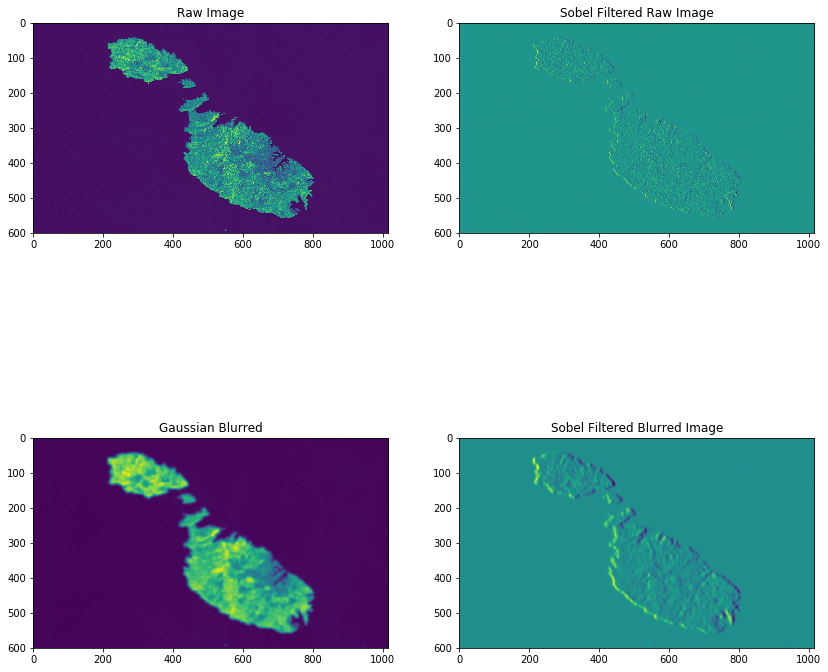

In [53]:
# Try default Sobel mask, w/ or w/o Gaussian blurring for edge detection
from scipy import ndimage, signal, misc
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt

image1 = misc.imread(image_file,flatten=1)

plt.rcParams['figure.figsize'] = [14, 14]

# Gaussian blur to smooth out rough edges
blur = 3; #blur width in pixels
img_GS = ndimage.gaussian_filter(image1, sigma=(blur, blur), order=0)

plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title('Raw Image')

plt.subplot(2,2,2)
plt.imshow(ndimage.sobel(image1))
plt.title('Sobel Filtered Raw Image')

plt.subplot(2,2,3)
plt.imshow(img_GS)
plt.title('Gaussian Blurred')

plt.subplot(2,2,4)
plt.imshow(ndimage.sobel(img_GS))
plt.title('Sobel Filtered Blurred Image')

#plt.savefig('Sobel.png', bbox_inches='tight')

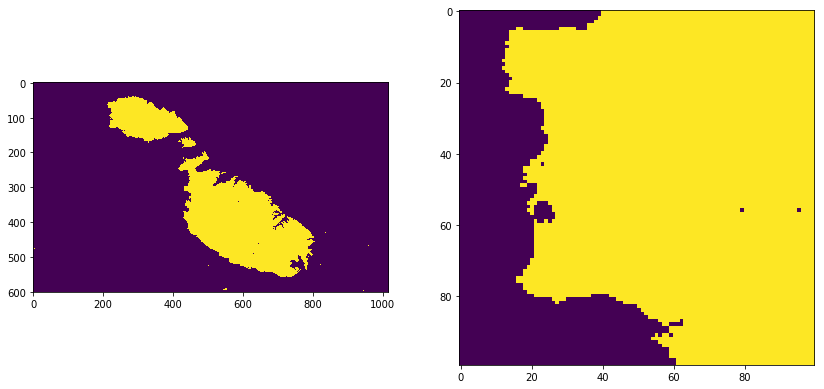

In [51]:
# In image: Sea low intensity, land high intensity
# make a binary, Malta-shaped mask by thresholding array

bin_msk = ndarray(shape(image1))# binary mask is same size of input array

thresh = 20 # theshold pixel value

bin_msk[image1>thresh] = 1
bin_msk[image1<thresh] = 0

# use median filter to remove single pixel noise
bin_msk = signal.medfilt(bin_msk)

plt.rcParams['figure.figsize'] = [14, 14]


plt.subplot(1,2,1)
plt.imshow(bin_msk)

plt.subplot(1,2,2)
plt.imshow(bin_msk[50:150,200:300]) #plot subset to see edge

#plt.savefig('Median_off.png', bbox_inches='tight')

Text(0.5, 1.0, 'Masked Imaged')

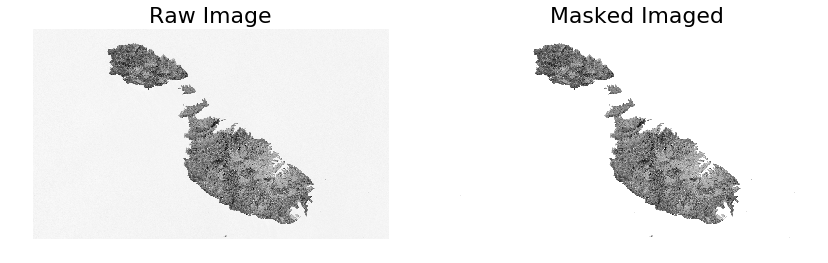

In [52]:
# Apply binary mask to image
# plot in reverse contrast to highlight edge
plt.subplot(1,2,1)
plt.imshow(image1,cmap = 'gray_r')
plt.axis('off')
plt.title('Raw Image',fontsize=22)

plt.subplot(1,2,2)
plt.imshow(bin_msk*image1,cmap = 'gray_r')
plt.axis('off')
plt.title('Masked Imaged',fontsize=22)

#plt.savefig('Malta_outline.png', bbox_inches='tight')

In [28]:
print(this_path)

C:\Users\David Lloyd\Documents\Work\Malta\Coding\Edge detection


In [46]:
print(len(onlyfiles))
print(onlyfiles)
for i in range(0,len(onlyfiles)):
    if ".bmp" in onlyfiles[i]:
        image_file = onlyfiles[i]

6
['Malta_outline.png', 'Median_off.png', 'Median_on.png', 'Simple Edge Detection.ipynb', 'T33SVV_20170309T095021_B08_band_1.bmp', 'Thumbs.db']


In [47]:
print(image_file)

T33SVV_20170309T095021_B08_band_1.bmp
